In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

visa_df=pd.read_csv(r'C:\Users\HP\Documents\NARESHIT\visadataset.csv')

cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

In [52]:
- We have two types of scaling

  - Z score (Standardization)

  - l t 

SyntaxError: invalid syntax (1906035285.py, line 1)

In [54]:
# Step-1 : take the prevailing wage data
# Step-2 : calculate mean of wage 
# Step-3 : calculate sd of wage
# Step-4 : Nr : step1-step2
# Step_5 : z=step4/step5

In [127]:
wage_data=visa_df['prevailing_wage']
mean=np.mean(wage_data)
wage_std=np.std(wage_data)
nr=wage_data-mean
wage_z=nr/wage_std
visa_df['wage_z'] = wage_z

In [129]:
wage_z

0       -1.398537
1        0.169835
2        0.919079
3        0.169994
4        1.428604
           ...   
25475    0.049924
25476    3.876159
25477    1.360280
25478    0.221509
25479   -0.067763
Name: prevailing_wage, Length: 25480, dtype: float64

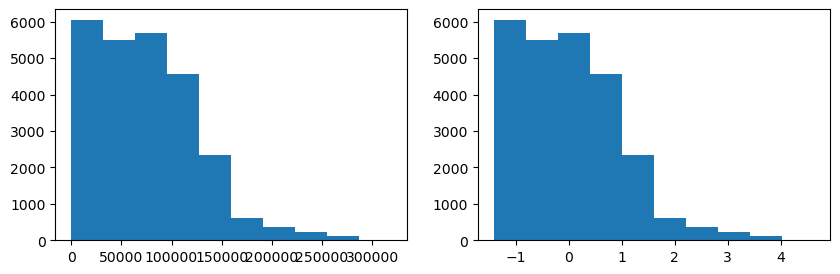

In [102]:
# histogram will not change
# only data values scaled down
# but the meaning of the data will not change
plt.figure(figsize=(10,3))
plt.subplot(1,2,1).hist(wage_data)
plt.subplot(1,2,2).hist(wage_z)
plt.show()

In [104]:
wage_data.idxmax(),wage_z.idxmax()

(21077, 21077)

In [106]:
wage_data.idxmin(),wage_z.idxmin()

(20575, 20575)

- id=21077 has maximum value in both data

- id=20575 has minimum value in both data

In [131]:
visa_df.iloc[[21077,20575]][['prevailing_wage','wage_z']]

,prevailing_wage,wage_z
21077,319210.2700,4.634193
20575,2.1367,-1.409710


In [133]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
wage_data=visa_df[['prevailing_wage']]
wage_data_ss=sc.fit_transform(wage_data)
visa_df['wage_data_ss']=wage_data_ss

In [137]:
visa_df[['prevailing_wage','wage_z','wage_data_ss']]

,prevailing_wage,wage_z,wage_data_ss
0,592.2029,-1.398537,-1.398537
1,83425.6500,0.169835,0.169835
2,122996.8600,0.919079,0.919079
3,83434.0300,0.169994,0.169994
4,149907.3900,1.428604,1.428604
...,...,...,...
25475,77092.5700,0.049924,0.049924
25476,279174.7900,3.876159,3.876159
25477,146298.8500,1.360280,1.360280
25478,86154.7700,0.221509,0.221509


**Normalization**

In [155]:
visa_df['prevailing_wage_minmax']=(visa_df['prevailing_wage']-visa_df['prevailing_wage'].min())/(visa_df['prevailing_wage'].max()-visa_df['prevailing_wage'].min())


In [147]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,wage_data_ss,prevailing_wage_minmax,wage_z
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398537,0.001849,-1.398537
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169835,0.261345,0.169835
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919079,0.385312,0.919079
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169994,0.261371,0.169994
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428604,0.469616,1.428604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.049924,0.241505,0.049924
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,3.876159,0.874579,3.876159
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1.360280,0.458311,1.360280
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.221509,0.269895,0.221509


In [121]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
visa_df['prevailing_wage_minmax'] = scaler.fit_transform(visa_df[['prevailing_wage']])

In [123]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,wage_data_ss,prevailing_wage_minmax
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398537,0.001849
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169835,0.261345
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919079,0.385312
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169994,0.261371
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428604,0.469616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.049924,0.241505
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,3.876159,0.874579
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1.360280,0.458311
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.221509,0.269895


(prevailing_wage    21077
 dtype: int64,
 21077)